<a href="https://colab.research.google.com/github/helinatefera/10xWeek4/blob/task-1/notebooks/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/store.csv')

In [5]:
data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [7]:
len(data)

1115

In [8]:
# Check for missing values
missing_summary = data.isnull().sum()
print("Missing Values:\n", missing_summary)

# Describe numerical features to identify outliers
print(data.describe())

Missing Values:
 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
            Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       Competition

In [10]:
# Custom function for handling outliers
def handle_outliers(X, method='cap_floor', quantile_range=(0.01, 0.99)):
    if method == 'cap_floor':
        lower_bound = X.quantile(quantile_range[0])
        upper_bound = X.quantile(quantile_range[1])
        return X.clip(lower_bound, upper_bound)
    return X


In [11]:
data["CompetitionDistance"] = data["CompetitionDistance"].fillna(data["CompetitionDistance"].mean())
data["CompetitionOpenSinceMonth"] = data["CompetitionOpenSinceMonth"].fillna(data["CompetitionOpenSinceMonth"].mean())
data["CompetitionOpenSinceYear"] = data["CompetitionOpenSinceYear"].fillna(data["CompetitionOpenSinceYear"].mean())
data["Promo2SinceWeek"] = data["Promo2SinceWeek"].fillna(data["Promo2SinceWeek"].mean())
data["Promo2SinceYear"] = data["Promo2SinceYear"].fillna(data["Promo2SinceYear"].mean())

In [15]:
print("Missing Values:\n", missing_summary)

Missing Values:
 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                544
dtype: int64


## Distribution of CompetitionDistance

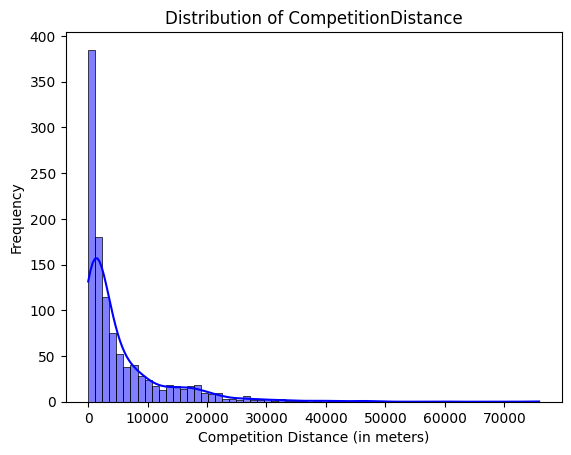

In [19]:
# Plot distribution of CompetitionDistance
sns.histplot(data["CompetitionDistance"], kde=True, color='blue')
plt.title("Distribution of CompetitionDistance")
plt.xlabel("Competition Distance (in meters)")
plt.ylabel("Frequency")
plt.show()